## **Concatenation and Merging in Pandas**

In [1]:
# Required liraries 

import pandas as pd
import numpy as np

In [2]:
# Loading the require datasets

courses = pd.read_csv('Datasets/courses.csv')

ipl = pd.read_csv('Datasets/deliveries.csv')

month1 = pd.read_csv('Datasets/reg-month1.csv')

month2 = pd.read_csv('Datasets/reg-month2.csv')

students = pd.read_csv('Datasets/students.csv')

matches = pd.read_csv('Datasets/matches.csv')

In [3]:
courses.sample(3)

,course_id,course_name,price
9,10,pyspark,2499
2,3,data analysis,4999
6,7,ms sxcel,1599


In [4]:
ipl.sample(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
21871,94,1,Royal Challengers Bangalore,Kings XI Punjab,2,2,V Kohli,J Arunkumar,IK Pathan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
54169,229,2,Delhi Daredevils,Deccan Chargers,3,2,TM Dilshan,V Sehwag,WPUJC Vaas,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
37243,159,2,Royal Challengers Bangalore,Chennai Super Kings,14,5,V Kohli,LRPL Taylor,SB Jakati,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [5]:
month1.sample(3)

,student_id,course_id
16,21,1
7,7,8
9,15,1


In [6]:
month2.sample(3)

,student_id,course_id
18,22,5
3,12,1
23,14,1


In [7]:
students.sample(3)

,student_id,name,partner
24,25,Shashank D’Alia,2
0,1,Kailash Harjo,23
1,2,Esha Butala,1


In [8]:
matches.sample(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
553,554,2015,Chennai,2015-05-04,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk",C Shamshuddin,K Srinath,NaN
254,255,2011,Kolkata,2011-04-20,Kochi Tuskers Kerala,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kochi Tuskers Kerala,6,0,DPMD Jayawardene,Eden Gardens,Aleem Dar,RB Tiffin,NaN
405,406,2013,Kolkata,2013-04-20,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,4,RA Jadeja,Eden Gardens,Asad Rauf,AK Chaudhary,NaN


#### **Concatenation**

**Concatenation means stacking two or more DataFrames together, either vertically (row-wise) or horizontally (column-wise)**

In [9]:
# Concat is use to merge or combime the Dataframes

combine_df = pd.concat([month1,month2])  # By default it merge vertically
combine_df.shape

(53, 2)

In [10]:
# From new indexes, we can use ignore_index = True 

regs = pd.concat([month1,month2],ignore_index=True)  # you will get new index


In [11]:
# In concat function we have keys parameter, which help us to create the multi-index DataFrame

multi = pd.concat([month1,month2],keys=['Nov','Dec'])

In [12]:
# Demo of multi-index df 

multi.loc['Nov']  # All registration of November month

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [13]:
multi.loc['Dec',10]

student_id    14
course_id      6
Name: (Dec, 10), dtype: int64

In [14]:
# Merging Side By Side (Horizontally)

pd.concat([month1,month2],axis=1).shape  # If rows are not equal then ,
# it merge acorrding to bigger df , and nan value for for missing rows , as we can see last 3 rows

(28, 4)

#### **Merging in Pandas (Joins)**

**Merging means combining two DataFrames based on one or more common columns, similar to SQL joins**

**Types of Join :**

| Type    | Meaning                                           |
| ------- | ------------------------------------------------- |
| `inner` | Only matched rows from both tables                |
| `left`  | All rows from the left table + matches            |
| `right` | All rows from the right table + matches           |
| `outer` | All rows from both tables (fills NaN if no match) |

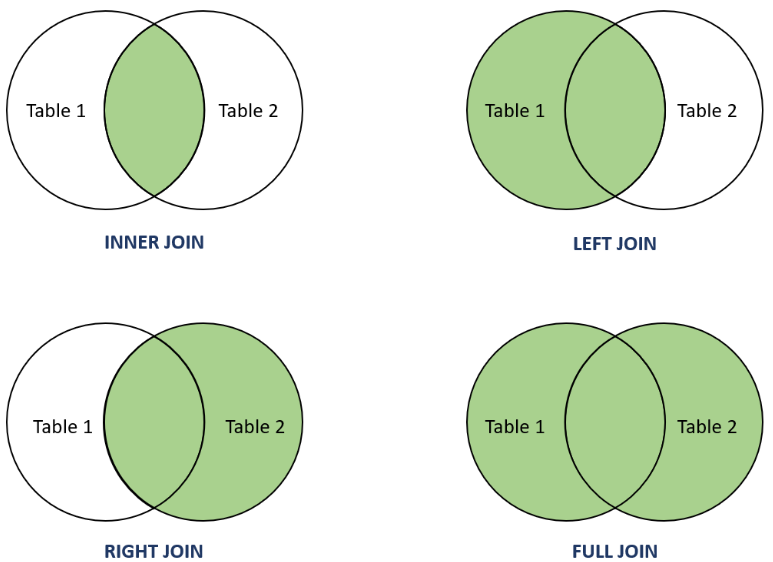

**1 ) Inner Join**

In [15]:
students.merge(regs,how='inner',on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


**2 ) Left Join**

In [16]:
courses.merge(regs,how='left',on='course_id')

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


**3 ) Right Join**

In [17]:
# Adding some more students

temp_df = pd.DataFrame({
    'student_id':[26,27,28],
    'name':['Kisna','Shubham','Krishna'],
    'partner':[28,26,17]
})

students = pd.concat([students,temp_df],ignore_index=True)

In [18]:
students.tail()

,student_id,name,partner
23,24,Radhika Suri,17
24,25,Shashank D’Alia,2
25,26,Kisna,28
26,27,Shubham,26
27,28,Krishna,17


In [19]:
students.merge(regs,how='right',on='student_id')

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


**4 ) Outer Join**

In [20]:
students.merge(regs,how='outer',on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23.0,1.0
1,1,Kailash Harjo,23.0,6.0
2,1,Kailash Harjo,23.0,10.0
3,1,Kailash Harjo,23.0,9.0
4,2,Esha Butala,1.0,5.0
...,...,...,...,...
58,27,Shubham,26.0,NaN
59,28,Krishna,17.0,NaN
60,38,NaN,NaN,1.0
61,42,NaN,NaN,9.0


##### **Some Practice Questions**

**Q1 ) Total Revenue generated**

In [21]:
total_revenue = regs.merge(courses,how='inner',on='course_id')['price'].sum()
print(total_revenue)

154247


**Q2) Find month by month revenue (dec and nov )**

In [22]:
both_month = pd.concat([month1,month2],keys=['Nov','Dec']).reset_index()

temp_df = both_month.merge(courses,how='inner',on='course_id')

both_month_revenue = temp_df.groupby('level_0')
both_month_revenue['price'].sum()


level_0
Dec    65072
Nov    89175
Name: price, dtype: int64

**Q3 ) Print a registration table ( cols will be name , course , price**

In [23]:
stud_df = regs.merge(courses,how='inner',on='course_id')
regs_table = students.merge(stud_df,how='inner',on='student_id')
regs_table[['name','course_name','price']]

,name,course_name,price
0,Kailash Harjo,python,2499
1,Kailash Harjo,power bi,1899
2,Kailash Harjo,pyspark,2499
3,Kailash Harjo,plotly,699
4,Esha Butala,tableau,2499
5,Parveen Bhalla,data analysis,4999
6,Parveen Bhalla,tableau,2499
7,Tarun Thaker,pandas,1099
8,Tarun Thaker,pyspark,2499
9,Tarun Thaker,ms sxcel,1599


**Q4 ) Plot a Bar Chart of revenue and course**

<Axes: xlabel='course_name'>

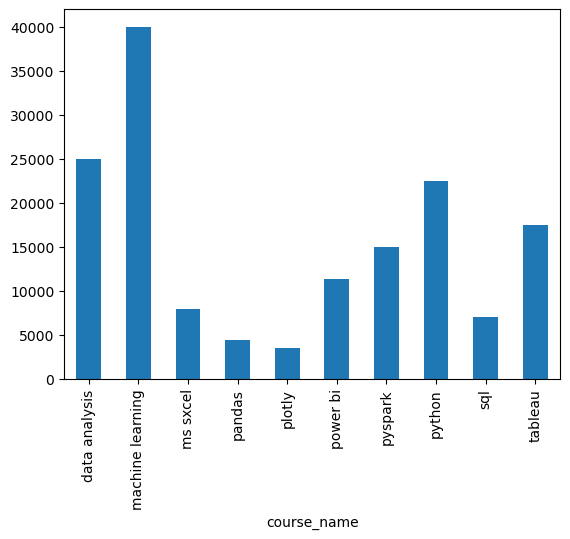

In [24]:
regs.merge(courses,how='inner',on='course_id')[['course_name','price']].groupby('course_name')['price'].sum().plot(kind='bar')

**Q5 ) Find the students who enrolled in both months**

In [25]:
common_ids = np.intersect1d(month1['course_id'] , month2['course_id'])
students[students['student_id'].isin(common_ids)]['name']

0         Kailash Harjo
1           Esha Butala
2        Parveen Bhalla
3           Marlo Dugal
4           Kusum Bahri
5    Lakshmi Contractor
6          Tarun Thaker
7        Radheshyam Dey
8     Nitika Chatterjee
9        Aayushman Sant
Name: name, dtype: object

**Q6 ) Find the course which got no enrollment**

In [26]:
regs.merge(courses,how='right',on='course_id').tail(2)

,student_id,course_id,course_name,price
53,NaN,11,Numpy,699
54,NaN,12,C++,1299


In [27]:
# Another way 

lt = np.setdiff1d(courses['course_id'],regs['course_id'])
courses[courses['course_id'].isin(lt)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


**Q7 ) Find the students who didn't enroll in any courses**

In [28]:
students_notenroll = students.merge(regs,how='left',on='student_id')
students_notenroll[students_notenroll['course_id'].isnull()]['name']

7            Marlo Dugal
8            Kusum Bahri
9     Lakshmi Contractor
15        Radheshyam Dey
16     Nitika Chatterjee
17        Aayushman Sant
43         Hanuman Hegde
57                 Kisna
58               Shubham
59               Krishna
Name: name, dtype: object

In [29]:
# Another way 

lt = np.setdiff1d(students['student_id'],regs['student_id'])
students[students['student_id'].isin(lt)]['name']

3            Marlo Dugal
4            Kusum Bahri
5     Lakshmi Contractor
7         Radheshyam Dey
8      Nitika Chatterjee
9         Aayushman Sant
19         Hanuman Hegde
25                 Kisna
26               Shubham
27               Krishna
Name: name, dtype: object

**Q8 ) Find student name and partner name for all enrollment**

In [30]:
# Self join
students.merge(students,how='inner',left_on='student_id',right_on='partner')[['name_x','name_y']]

,name_x,name_y
0,Kailash Harjo,Esha Butala
1,Esha Butala,Shashank D’Alia
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Nitika Chatterjee
4,Kusum Bahri,Radheshyam Dey
5,Lakshmi Contractor,Kusum Bahri
6,Tarun Thaker,Yasmin Palan
7,Radheshyam Dey,Aayushman Sant
8,Nitika Chatterjee,Tarun Thaker
9,Aayushman Sant,Lakshmi Contractor


**Q9 ) Find the top 3 students who most enrollments**

In [31]:
regs.merge(students,how='inner',on='student_id')['name'].value_counts() 

# Problem in this approach is name can repeat , so it not work

name
Chhavi Lachman        6
Tarun Thaker          5
Radha Dutt            4
Elias Dodiya          4
Kailash Harjo         4
Pranab Natarajan      4
Yash Sethi            3
David Mukhopadhyay    3
Fardeen Mahabir       3
Preet Sha             2
Parveen Bhalla        2
Qabeel Raman          2
Shashank D’Alia       2
Yasmin Palan          2
Munni Varghese        1
Seema Kota            1
Radhika Suri          1
Esha Butala           1
Name: count, dtype: int64

In [32]:
students.merge(regs,how='inner',on='student_id').groupby(['student_id','name'])['name'].count().sort_values(ascending=False).reset_index(name='num_of_enroll').head(3)

,student_id,name,num_of_enroll
0,23,Chhavi Lachman,6
1,7,Tarun Thaker,5
2,14,Pranab Natarajan,4


**Q10 ) Find top 3 students who spent most amount of money on courses**

In [40]:
temp_st = students.merge(regs,how='inner',on='student_id')[['name','student_id','course_id']].merge(courses,how='inner',on='course_id')
temp_st.groupby(['student_id','name'])['price'].sum().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
Name: price, dtype: int64

#### **Alternate Syntax Merge**

In [42]:
# students.merge(regs)  ---> Normal syntax

#  ---> pd.merge(students,regs,how='inner',on='student_id')

##### **More Practice Questions on Ipl Dataset**

**Q1 ) Find top 3 stadiums with highest sixes / match ratio**

In [49]:
matches.sample(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
295,296,2011,Dharamsala,2011-05-17,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Kings XI Punjab,111,0,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba,NaN
533,534,2015,Bangalore,2015-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Mumbai Indians,18,0,Harbhajan Singh,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,NaN


In [52]:
ipl.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [99]:
combine_df = matches.merge(ipl,how='inner',left_on='id',right_on='match_id')

sixes_df = combine_df[combine_df['batsman_runs'] == 6] # Filtered Data ( only sixes )

num_sixes = sixes_df.groupby('venue')['venue'].count()  # Number of sixes in stadium

num_matches = matches['venue'].value_counts()  # Number of matches in each stadium

In [98]:
(num_sixes / num_matches).sort_values(ascending=False).head(3)

venue
Holkar Cricket Stadium     17.600000
M Chinnaswamy Stadium      13.227273
Sharjah Cricket Stadium    12.666667
dtype: float64

**Q2 ) Find the orange cap hold of every seasons**

In [101]:
# We are same the combine_df 
combine_df.sample(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
36117,155,2009,Kimberley,2009-05-11,Deccan Chargers,Rajasthan Royals,Deccan Chargers,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
10459,45,2017,Bangalore,2017-05-07,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
58685,248,2011,Chennai,2011-04-16,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
109466,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4021,17,2017,Bangalore,2017-04-16,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [117]:
# Batsman with most runs in every season

combine_df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False).drop_duplicates(subset=['season'],keep='first').sort_values('season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641
